<a href="https://colab.research.google.com/github/oradbarel/C-Multi-Threaded-Server-Client/blob/main/316084623-311288203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot
from matplotlib import pylab
from sklearn.model_selection import train_test_split
params = {'xtick.labelsize': 18,
 'ytick.labelsize': 18,
 'axes.titlesize' : 22,
 'axes.labelsize' : 20,
 'legend.fontsize': 18,
 'legend.title_fontsize': 22,
 'figure.titlesize': 24
 }
pylab.rcParams.update(params)

Part 1: Data loading and First Look

In [ ]:
virus_data = pd.read_csv("virus_data.csv")
virus_df = pd.DataFrame(data=virus_data)
virus_df.shape

(1250, 26)

In [ ]:
virus_df['num_of_siblings'].value_counts()

1    399
2    317
0    271
3    161
4     62
5     31
6      6
7      2
8      1
Name: num_of_siblings, dtype: int64

Partitioning the Data

In [ ]:
rand_seed = 23 # + parter last 2 digins of id
train, test = train_test_split(virus_df, test_size=0.2, random_state=rand_seed)

Part2: Warming up with k-Nearest Neighbors

Basic Data Exploration

In [ ]:
train.corr().spread.PCR_01

0.10095819141067508

In [ ]:
train.corr().spread.PCR_02

0.5123103409911332

In [ ]:
train.corr().spread.PCR_09

-0.02078913882635519

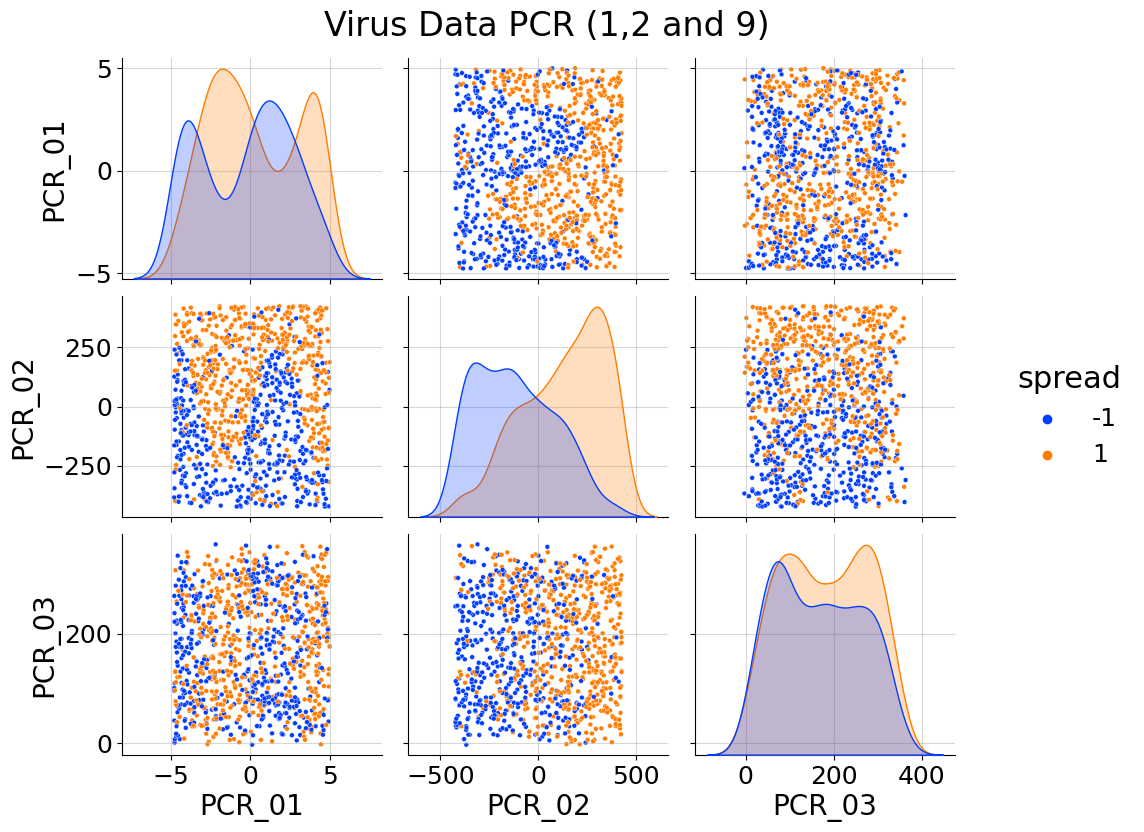

In [ ]:
g=sns.pairplot(data=train, hue="spread", palette="bright", vars=["PCR_01", "PCR_02", "PCR_03"], plot_kws={"s": 12})
g.fig.suptitle("Virus Data PCR (1,2 and 9)", y=1.04)
for ax in np.ravel(g.axes):
 ax.grid(alpha=0.5)
g.fig.set_size_inches(12,8)

k-NN Implementation

In [ ]:
from sklearn.base import BaseEstimator,ClassifierMixin
import scipy

In [ ]:
class kNN(BaseEstimator, ClassifierMixin):
    def __init__(self, n_neighbors:int = 3):
        self.n_neighbors = n_neighbors
    def fit(self, X, y):
        # TODO: complete
        self.X = np.copy(X)
        self.y = np.copy(y)
        return self
    def predict(self, X):
        # Note: You can use self.n_neighbors here
        predictions = None
        # TODO: compute the predicted labels (+1 or -1)
        dist_mat = scipy.spatial.distance.cdist(XA=X, XB=self.X)
        sort_dist_idx = np.argpartition(a=dist_mat, kth=self.n_neighbors, axis=1)
        pred_sum = np.sum(self.y[sort_dist_idx][:, 0:self.n_neighbors], axis=1)
        predictions = np.where(pred_sum>0, 1, -1)
        return predictions

In [ ]:
temp_df=pd.DataFrame(data=train, columns=["PCR_01", "PCR_02", "spread"])
x_data = temp_df[["PCR_01", "PCR_02"]]
y_data = temp_df["spread"]
model = kNN(n_neighbors=1)
model.fit(X=x_data, y=y_data)

kNN(n_neighbors=1)

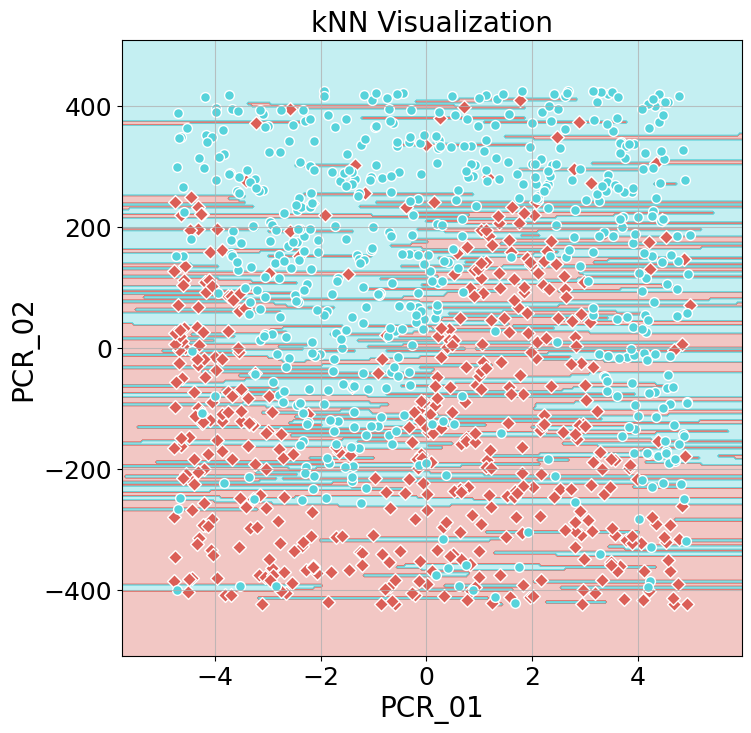

In [ ]:
from visualize_clf import visualize_clf
visualize_clf(clf=model, X=x_data.to_numpy(), Y=y_data, title="kNN Visualization", xlabel="PCR_01", ylabel="PCR_02")

In [ ]:
model.score(x_data,y_data)

1.0

Data Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
x_data_min_max = min_max_scaler.fit_transform(x_data)
model.fit(X=x_data_min_max, y=y_data)

kNN(n_neighbors=1)

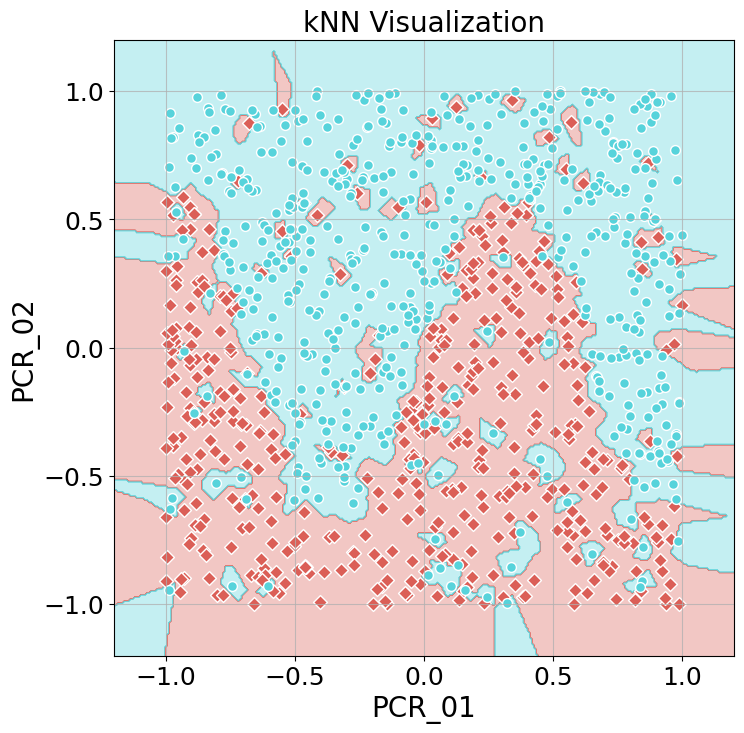

1.0

In [ ]:
visualize_clf(clf=model, X=x_data_min_max, Y=y_data, title="kNN Visualization", xlabel="PCR_01", ylabel="PCR_02")
model.score(x_data_min_max,y_data)

In [ ]:
std_scaler = StandardScaler()
x_data_std = std_scaler.fit_transform(x_data)
std_model = kNN(n_neighbors=7)
std_model.fit(X=x_data_std, y=y_data)

kNN(n_neighbors=7)

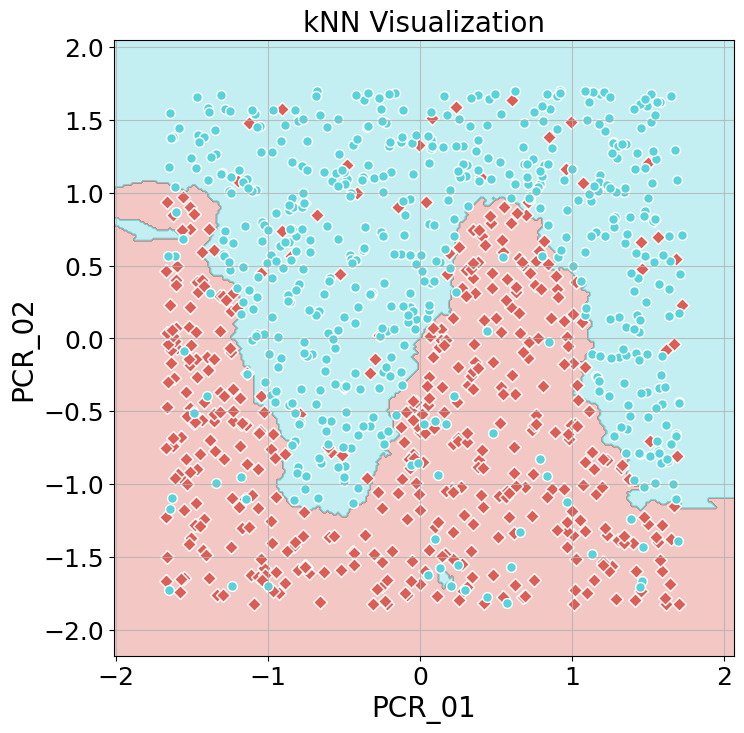

0.717

In [ ]:
visualize_clf(clf=std_model, X=x_data_std, Y=y_data, title="kNN Visualization", xlabel="PCR_01", ylabel="PCR_02")
model.score(x_data_std,y_data)